In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In C:\Users\admin\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\admin\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\admin\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\admin\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\admin\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [2]:
df=pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df['Age'].fillna(value=df['Age'].median(),inplace=True)
df['Age'].isnull().sum()

0

In [5]:
df['Cabin'].fillna(value='Missing',inplace=True)

In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
df['Cabin'].value_counts()

Missing        687
G6               4
B96 B98          4
C23 C25 C27      4
D                3
              ... 
E50              1
E36              1
C103             1
D19              1
B73              1
Name: Cabin, Length: 148, dtype: int64

In [8]:
df[df['Cabin'].isnull()]['Survived'].sum()

0

In [9]:
an_list=[]
for val in df['Cabin']:
    if val is np.nan:
        an_list.append(val)
    else:
        an_list.append(val[0])
print(len(an_list))

891


<AxesSubplot:ylabel='count'>

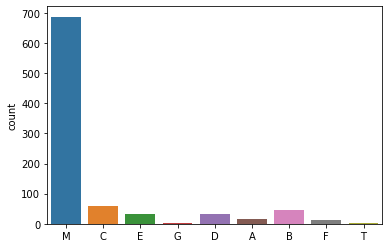

In [10]:
sns.countplot(x=an_list)

In [11]:
df['Cabin']=an_list
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S


In [12]:
dict1=dict(df.groupby('SibSp')['Survived'].mean())

In [13]:
df['SibSp_target_mean']=df['SibSp'].map(dict1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SibSp_target_mean
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,0.535885
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,0.535885
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,0.345395
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,0.535885
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,0.345395


In [14]:
dict1=dict(df.groupby('Parch')['Survived'].mean())
df['Parch_target_mean']=df['Parch'].map(dict1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SibSp_target_mean,Parch_target_mean
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,0.535885,0.343658
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,0.535885,0.343658
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,0.345395,0.343658
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,0.535885,0.343658
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,0.345395,0.343658


In [15]:
dict1=dict(df.groupby('Cabin')['Survived'].mean())
df['Cabin_target_mean']=df['Cabin'].map(dict1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SibSp_target_mean,Parch_target_mean,Cabin_target_mean
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,0.535885,0.343658,0.299854
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,0.535885,0.343658,0.593220
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,0.345395,0.343658,0.299854
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,0.535885,0.343658,0.593220
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,0.345395,0.343658,0.299854


In [16]:
list1=[]
for val in df['Ticket']:
    inn=val.isnumeric()
    if(inn):
        list1.append(1)
    else:
        list1.append(0)    
print(len(list1))
df['Ticket_new']=list1
df.head()

891


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SibSp_target_mean,Parch_target_mean,Cabin_target_mean,Ticket_new
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,0.535885,0.343658,0.299854,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,0.535885,0.343658,0.593220,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,0.345395,0.343658,0.299854,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,0.535885,0.343658,0.593220,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,0.345395,0.343658,0.299854,1


<AxesSubplot:ylabel='count'>

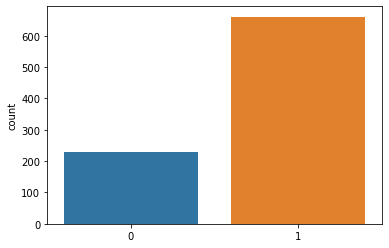

In [17]:
sns.countplot(x=list1)

In [18]:
df.dtypes

PassengerId            int64
Survived               int64
Pclass                 int64
Name                  object
Sex                   object
Age                  float64
SibSp                  int64
Parch                  int64
Ticket                object
Fare                 float64
Cabin                 object
Embarked              object
SibSp_target_mean    float64
Parch_target_mean    float64
Cabin_target_mean    float64
Ticket_new             int64
dtype: object

In [19]:
x=df[['Pclass','Sex','Age','Fare','Embarked','SibSp_target_mean','Parch_target_mean','Cabin_target_mean','Ticket_new']]
y=df['Survived']
x.head()

,Pclass,Sex,Age,Fare,Embarked,SibSp_target_mean,Parch_target_mean,Cabin_target_mean,Ticket_new
0,3,male,22.0,7.2500,S,0.535885,0.343658,0.299854,0
1,1,female,38.0,71.2833,C,0.535885,0.343658,0.593220,0
2,3,female,26.0,7.9250,S,0.345395,0.343658,0.299854,0
3,1,female,35.0,53.1000,S,0.535885,0.343658,0.593220,1
4,3,male,35.0,8.0500,S,0.345395,0.343658,0.299854,1


In [20]:
x.dtypes

Pclass                 int64
Sex                   object
Age                  float64
Fare                 float64
Embarked              object
SibSp_target_mean    float64
Parch_target_mean    float64
Cabin_target_mean    float64
Ticket_new             int64
dtype: object

In [21]:
x=pd.get_dummies(x)
x.head()

,Pclass,Age,Fare,SibSp_target_mean,Parch_target_mean,Cabin_target_mean,Ticket_new,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,7.2500,0.535885,0.343658,0.299854,0,0,1,0,0,1
1,1,38.0,71.2833,0.535885,0.343658,0.593220,0,1,0,1,0,0
2,3,26.0,7.9250,0.345395,0.343658,0.299854,0,1,0,0,0,1
3,1,35.0,53.1000,0.535885,0.343658,0.593220,1,1,0,0,0,1
4,3,35.0,8.0500,0.345395,0.343658,0.299854,1,0,1,0,0,1


In [27]:
min(x['Age']),max(x['Age'])

(0.42, 74.0)

In [28]:
IQR= x['Age'].quantile(0.75)-x['Age'].quantile(0.25)
print('IQR:',IQR)
low_bound=x['Age'].quantile(0.25)-(IQR*2)
up_bound=x['Age'].quantile(0.75)+(IQR*2)
print('lower bound is {} and upper bound is {}:'.format(low_bound,up_bound))

IQR: 13.0
lower bound is -4.0 and upper bound is 61.0:


In [29]:
x.loc[x['Age']>61,'Age']=61

In [30]:
min(x['Fare']),max(x['Fare'])

(0.0, 512.3292)

In [26]:
IQR= x['Fare'].quantile(0.75)-x['Fare'].quantile(0.25)
print('IQR:',IQR)
low_bound=x['Fare'].quantile(0.25)-(IQR*3)
up_bound=x['Fare'].quantile(0.75)+(IQR*3)
print('lower bound is {} and upper bound is {}:'.format(low_bound,up_bound))

IQR: 23.0896
lower bound is -61.358399999999996 and upper bound is 100.2688:


In [31]:
x.loc[x['Fare']>100,'Fare']=100

In [32]:
min(x['Fare']),max(x['Fare'])

(0.0, 100.0)

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,stratify=y,random_state=42)

In [34]:
from sklearn.preprocessing import RobustScaler
rs=RobustScaler()
rs.fit(np.array(x_train['Age']).reshape(-1,1))
x_train['Age_rs']=rs.transform(np.array(x_train['Age']).reshape(-1,1))
x_test['Age_rs']=rs.transform(np.array(x_test['Age']).reshape(-1,1))
x_train.head()

C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Pclass,Age,Fare,SibSp_target_mean,Parch_target_mean,Cabin_target_mean,Ticket_new,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age_rs
486,1,35.0,90.000,0.535885,0.343658,0.593220,1,1,0,0,0,1,0.500000
238,2,19.0,10.500,0.345395,0.343658,0.299854,1,0,1,0,0,1,-0.642857
722,2,34.0,13.000,0.345395,0.343658,0.299854,1,0,1,0,0,1,0.428571
184,3,4.0,22.025,0.345395,0.500000,0.299854,1,1,0,0,0,1,-1.714286
56,2,21.0,10.500,0.345395,0.343658,0.299854,0,1,0,0,0,1,-0.500000


In [35]:
rs_f=RobustScaler()
rs_f.fit(np.array(x_train['Fare']).reshape(-1,1))
x_train['Faree_rs']=rs_f.transform(np.array(x_train['Fare']).reshape(-1,1))
x_test['Fare_rs']=rs_f.transform(np.array(x_test['Fare']).reshape(-1,1))
x_train.head()

C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Pclass,Age,Fare,SibSp_target_mean,Parch_target_mean,Cabin_target_mean,Ticket_new,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age_rs,Faree_rs
486,1,35.0,90.000,0.535885,0.343658,0.593220,1,1,0,0,0,1,0.500000,3.368383
238,2,19.0,10.500,0.345395,0.343658,0.299854,1,0,1,0,0,1,-0.642857,-0.148663
722,2,34.0,13.000,0.345395,0.343658,0.299854,1,0,1,0,0,1,0.428571,-0.038064
184,3,4.0,22.025,0.345395,0.500000,0.299854,1,1,0,0,0,1,-1.714286,0.361198
56,2,21.0,10.500,0.345395,0.343658,0.299854,0,1,0,0,0,1,-0.500000,-0.148663


In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,KFold
log_model=LogisticRegression(random_state=42)
cv=KFold(n_splits=5, shuffle=True, random_state=42)
params={'C':10.0**np.arange(-3,3)} #'l1_ratio':[0,0.25,0.5,0.75,1]
grid_cv=GridSearchCV(log_model,param_grid=params,cv=cv)
grid_cv.fit(x_train,y_train)
y_pred=grid_cv.predict(x_test)
print('accuracy is :',accuracy_score(y_test,y_pred))

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

accuracy is : 0.7757847533632287


C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

In [46]:
print('accuracy is :',accuracy_score(y_test,y_pred))

accuracy is : 0.7757847533632287


In [62]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier()
cv=KFold(n_splits=5, shuffle=True, random_state=42)
params={'n_neighbors':[3,4,5,6,7],'weights':['uniform','distance'],'leaf_size':[30,40,50],'metric':['manhattan','minkowski','euclidean']}
grid_cv=GridSearchCV(knn_model,param_grid=params,cv=cv)
#print(grid_cv.get_params().keys())
grid_cv.fit(x_train,y_train)
y_pred=grid_cv.predict(x_test)
print('accuracy is :',accuracy_score(y_test,y_pred))

accuracy is : 0.7309417040358744


In [63]:
random_cv.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=6, weights='distance')

In [65]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
cv=KFold(n_splits=5, shuffle=True, random_state=42)
params={'criterion':['gini','entropy'],'max_depth':[3,4,5,6],'min_samples_split':[2,3,4,5,6],'min_samples_leaf':[1,2,3,4],'max_features':['sqrt','log2']}
grid_cv=GridSearchCV(dt_model,param_grid=params,cv=cv)
#print(grid_cv.get_params().keys())
grid_cv.fit(x_train,y_train)
y_pred=grid_cv.predict(x_test)
print('accuracy is :',accuracy_score(y_test,y_pred))

accuracy is : 0.7802690582959642


In [66]:
grid_cv.best_estimator_

DecisionTreeClassifier(max_depth=5, max_features='log2', min_samples_leaf=3,
                       min_samples_split=4)

In [71]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier()
cv=KFold(n_splits=5, shuffle=True, random_state=42)
params={'criterion':['gini','entropy'],'n_estimators':[100,150,200],'min_samples_split':[2,3,4,5,6],'min_samples_leaf':[1,2,3,4],'max_features':['sqrt','log2'],'class_weight':['balanced','balanced_subsample']}
random_cv=GridSearchCV(rf_model,param_grid=params,cv=cv)
#print(grid_cv.get_params().keys())
random_cv.fit(x_train,y_train)
y_pred=random_cv.predict(x_test)
print('accuracy is :',accuracy_score(y_test,y_pred))

accuracy is : 0.7668161434977578


In [72]:
random_cv.best_estimator_

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_features='sqrt', min_samples_split=6)

In [76]:
from sklearn.model_selection import StratifiedKFold
log_model=LogisticRegression(random_state=42)
cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
params={'C':10.0**np.arange(-3,3)} #'l1_ratio':[0,0.25,0.5,0.75,1]
grid_cv=GridSearchCV(log_model,param_grid=params,cv=cv)
grid_cv.fit(x_train,y_train)
y_pred=grid_cv.predict(x_test)
print('accuracy is :',accuracy_score(y_test,y_pred))

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

In

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

accuracy is : 0.7623318385650224


C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg